In [1]:
from environment import Environment
from agents.SimpleRandomAgent import *
from agents.DQNAgent import DQNAgent
from model.DQN import SampleDQN
from figure import figure

## Environment Settings
|      Argument      |  Type  | Range           | Default |                                                         Explanation                                                        |
|:------------------:|:------:|:---------------:|:-------:|:--------------------------------------------------------------------------------------------------------------------------|
|     `SkipFrame`    |  `int` | `[0,?)`           |    `0`    | The number of frames skipped before the agent makes another decision. During the skipped frames, the actions are repeated. |
|   `RenderScreen`   |  `int` | `[0,?)`           |    `0`    | If `0`, no animation will be provided. If positive, the state will be rendered every `RenderScreen` frames.                  |
| `PrintInformation` | `bool` | `True`, `False` |  `True` | Whether information should be provided after each episode.  You may want to set it to `False` when `RenderScreen > 0`.     |

In [2]:
agent = DQNAgent(SampleDQN, input_shape = (80, 84, 4),replaybuffersize = 300000, input_preprocess = [
    figure.downsample((None, None, 3), (2, -2, 3)),
    figure.gray_scale(),
    figure.channelize()
])
agent.setparam(learn_each = 4, epsilon_decay_rate = 0.9999975, save_each = 20000)
print(agent.getparams())

{'burn_in': 10000, 'copy_each': 5000, 'learn_each': 4, 'save_each': 20000, 'final_epsilon': 0.1, 'epsilon_decay_rate': 0.9999975, 'batch_size': 32, 'gamma': 0.99}


In [3]:
%matplotlib inline
env = Environment(world = 1, stage = 1, version = 2)
env.setparam(RenderScreen = 16, SkipFrame = 3, PrintInformation = True, ShowEpisodeEach = 10)
print(env.getparams())

{'SkipFrame': 3, 'RenderScreen': 16, 'PrintInformation': True, 'ShowEpisodeEach': 10}


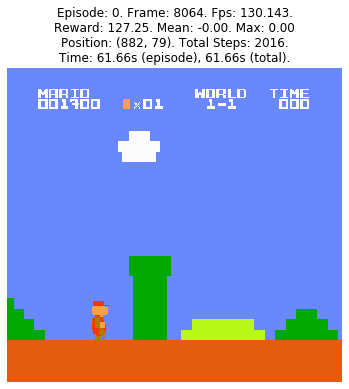

Episode 0 ended in 2020 steps. Average fps: 130.10932158460767. Reward: 124.25. Position: 884. 
Episode 1 ended in 2020 steps. Average fps: 437.98294097605844. Reward: 21.5. Position: 554. 
Episode 2 ended in 2020 steps. Average fps: 447.84377572453116. Reward: 37.25. Position: 594. 


KeyboardInterrupt: 

In [4]:
env.run(agent, maxepisode = -1)